In [139]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

df_latency_horizontal = pd.read_csv('../../results-with-loadbalancer/results-horizontal-latency-2-lb/exp1_21_4_generic_Latency_1.csv')
df_latency_vertical = pd.read_csv('../../results-with-loadbalancer/results-vertical-latency-1-lb/exp2_21_2000_generic_Latency_1.csv')



print(df_latency_horizontal.head())
print(df_latency_vertical.head())



  labels   timestamp      value
0     {}  1713759266  44.117017
1     {}  1713759271  21.587515
2     {}  1713759276  19.443521
3     {}  1713759281  18.897669
4     {}  1713759286  17.579943
  labels   timestamp        value
0     {}  1713211777    11.125039
1     {}  1713211782    14.500000
2     {}  1713211787    12.181818
3     {}  1713211792    13.000000
4     {}  1713211797  1057.679108


In [140]:
print(df_latency_horizontal.info())
print(df_latency_vertical.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   labels     241 non-null    object 
 1   timestamp  241 non-null    int64  
 2   value      241 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   labels     241 non-null    object 
 1   timestamp  241 non-null    int64  
 2   value      241 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.8+ KB
None


In [141]:
print(df_latency_horizontal.describe())
print(df_latency_vertical.describe())

          timestamp        value
count  2.410000e+02   241.000000
mean   1.713760e+09   757.364313
std    3.485745e+02   959.780840
min    1.713759e+09    16.855237
25%    1.713760e+09    91.551425
50%    1.713760e+09   155.453302
75%    1.713760e+09  2041.859900
max    1.713760e+09  5239.155669
          timestamp         value
count  2.410000e+02    241.000000
mean   1.713212e+09    655.273628
std    3.485745e+02   1569.352889
min    1.713212e+09     11.125039
25%    1.713212e+09     67.641736
50%    1.713212e+09     76.250393
75%    1.713213e+09    858.789098
max    1.713213e+09  11899.027687


In [142]:
threshold = 3000

# Filter the data to exclude any outliers
df_latency_horizontal_filtered = df_latency_horizontal[df_latency_horizontal['value'] <= threshold]
df_latency_vertical_filtered = df_latency_vertical[df_latency_vertical['value'] <= threshold]

#  95th percentile latency for both horizontal and vertical scaling
percentile_95_latency_horizontal = df_latency_horizontal_filtered['value'].quantile(0.95)
percentile_95_latency_vertical = df_latency_vertical_filtered['value'].quantile(0.95)

print(f"95th Percentile Latency for Horizontal: {percentile_95_latency_horizontal} ms")
print(f"95th Percentile Latency for Vertical: {percentile_95_latency_vertical} ms")

horizontal_requirement_met = percentile_95_latency_horizontal <= 200
vertical_requirement_met = percentile_95_latency_vertical <= 200

print(f"Horizontal Requirement Met: {horizontal_requirement_met}")
print(f"Vertical Requirement Met: {vertical_requirement_met}")

95th Percentile Latency for Horizontal: 2195.236723508152 ms
95th Percentile Latency for Vertical: 1644.3761011106853 ms
Horizontal Requirement Met: False
Vertical Requirement Met: False


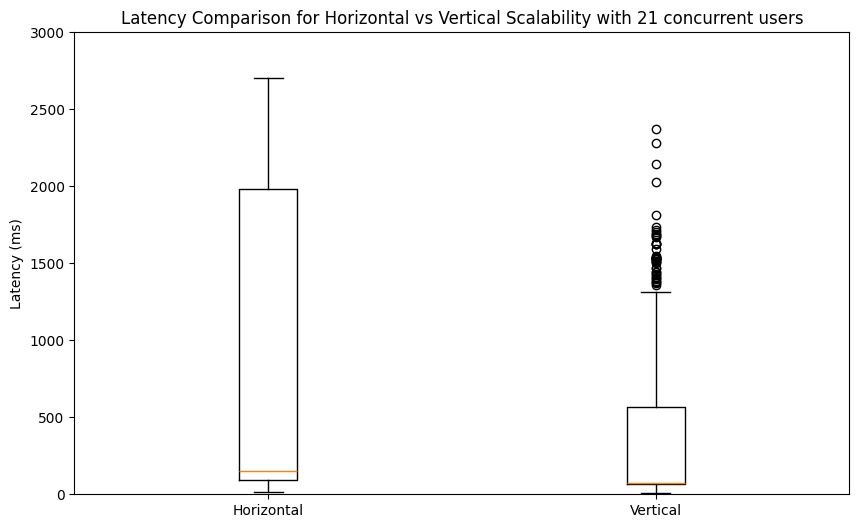

In [143]:
if 'value' in df_latency_horizontal.columns and 'value' in df_latency_vertical.columns:
    plt.figure(figsize=(10, 6))
    plt.boxplot([df_latency_horizontal_filtered['value'], df_latency_vertical_filtered['value']], labels=['Horizontal', 'Vertical'])
    plt.title('Latency Comparison for Horizontal vs Vertical Scalability with 21 concurrent users')
    plt.ylabel('Latency (ms)')
    plt.ylim(0, threshold)  
    plt.show()
else:
    print("Value column not found in one of the DataFrames.")